<a href="https://colab.research.google.com/github/AlexaDestroyer/Analise_de_dados/blob/main/ProphetBasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
!pip install prophet


In [23]:
#Coleta dos dados
df1 = pd.read_csv('/content/jul_1994_dez_1999.csv')
df2 = pd.read_csv('/content/jan_2000_dez_2004.csv')
df3 = pd.read_csv('/content/jan_2005_dez_2009.csv')
df4 = pd.read_csv('/content/jan_2010_dez_2014.csv')
df5 = pd.read_csv('/content/jan_2015_dez_2019.csv')
df6 = pd.read_csv('/content/jan_2020_jul_2024.csv')

#concatenado a base de dados
dados=pd.concat([df1,df2,df3,df4,df5,df6])

In [24]:
dados.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,30.12.1999,17.092,16.778,17.105,16.778,"656,74M","1,90%"
1,29.12.1999,16.773,16.391,16.812,16.363,"538,90M","2,42%"
2,28.12.1999,16.377,16.017,16.399,15.969,"482,05M","2,29%"
3,27.12.1999,16.011,15.956,16.120,15.880,"525,72M","0,36%"
4,23.12.1999,15.953,15.926,16.000,15.749,"802,77M","0,23%"


In [25]:
dados.shape

(7437, 7)

In [26]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7437 entries, 0 to 1128
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      7437 non-null   object 
 1   Último    7437 non-null   float64
 2   Abertura  7437 non-null   float64
 3   Máxima    7437 non-null   float64
 4   Mínima    7437 non-null   float64
 5   Vol.      7436 non-null   object 
 6   Var%      7437 non-null   object 
dtypes: float64(4), object(3)
memory usage: 722.9+ KB


In [27]:
dados.isnull().sum()

,0
Data,0
Último,0
Abertura,0
Máxima,0
Mínima,0
Vol.,1
Var%,0


In [28]:
dados.duplicated().sum()

0

In [29]:
#ajuste da coluna Var%
dados["Var%"] = dados["Var%"].str.replace(",", ".").str.replace("%", "").astype(float)

In [30]:
#ajuste da coluna Vol.
dados["aux"] = dados["Vol."].str[-1]
dados["Vol."] = dados["Vol."].str.replace(",", ".").str.replace("B", "").str.replace("M", "").str.replace("K", "").astype(float)

dados["Vol."] = dados.apply(lambda x: x["Vol."] * 1_000_000_000 if x["aux"] == 'B'
                           else x["Vol."] * 1_000_000 if x["aux"] == 'M'
                           else x["Vol."] * 1_000, axis=1)
dados.drop('aux', axis=1, inplace=True)

In [31]:
dados.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,30.12.1999,17.092,16.778,17.105,16.778,656740000.0,1.90
1,29.12.1999,16.773,16.391,16.812,16.363,538900000.0,2.42
2,28.12.1999,16.377,16.017,16.399,15.969,482050000.0,2.29
3,27.12.1999,16.011,15.956,16.120,15.880,525720000.0,0.36
4,23.12.1999,15.953,15.926,16.000,15.749,802770000.0,0.23


In [32]:
dados[dados['Vol.'].isnull() == True]

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
963,10.02.2016,40.377,40.592,40.592,39.96,NaN,-0.53


In [33]:
dados.rename(columns={'Data': 'ds', 'Último': 'y'}, inplace=True)
dados.fillna(0, inplace=True)  # Preenche todos os valores vazios com 0
dados.isnull().sum()

,0
ds,0
y,0
Abertura,0
Máxima,0
Mínima,0
Vol.,0
Var%,0


In [34]:
dados.head()

,ds,y,Abertura,Máxima,Mínima,Vol.,Var%
0,30.12.1999,17.092,16.778,17.105,16.778,656740000.0,1.90
1,29.12.1999,16.773,16.391,16.812,16.363,538900000.0,2.42
2,28.12.1999,16.377,16.017,16.399,15.969,482050000.0,2.29
3,27.12.1999,16.011,15.956,16.120,15.880,525720000.0,0.36
4,23.12.1999,15.953,15.926,16.000,15.749,802770000.0,0.23


In [35]:
dados['ds'] = pd.to_datetime(dados['ds'])

<ipython-input-35-808b79790325>:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dados['ds'] = pd.to_datetime(dados['ds'])


In [36]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7437 entries, 0 to 1128
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        7437 non-null   datetime64[ns]
 1   y         7437 non-null   float64       
 2   Abertura  7437 non-null   float64       
 3   Máxima    7437 non-null   float64       
 4   Mínima    7437 non-null   float64       
 5   Vol.      7437 non-null   float64       
 6   Var%      7437 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 722.9 KB


In [37]:
# Iniciando o modelo Prophet
model = Prophet()
# Ajustando modelo aos dados
model.fit(dados)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxunb_ped/25ycjrm7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxunb_ped/kf9f16rk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11928', 'data', 'file=/tmp/tmpxunb_ped/25ycjrm7.json', 'init=/tmp/tmpxunb_ped/kf9f16rk.json', 'output', 'file=/tmp/tmpxunb_ped/prophet_modeleh8nvp9u/prophet_model-20240730203542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:35:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:36:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [38]:
#DataFrame com datas futuras para a previsão
future = model.make_future_dataframe(periods=365)

# Fazendo a previsão
forecast = model.predict(future)

# Visualização das previsões
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


             ds        yhat  yhat_lower  yhat_upper
7797 2025-07-11  131.167660  123.389434  139.626845
7798 2025-07-12  131.532917  123.087148  139.564819
7799 2025-07-13  131.612169  122.829832  139.618617
7800 2025-07-14  131.363011  122.554030  139.270031
7801 2025-07-15  131.447285  122.973140  139.277176


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


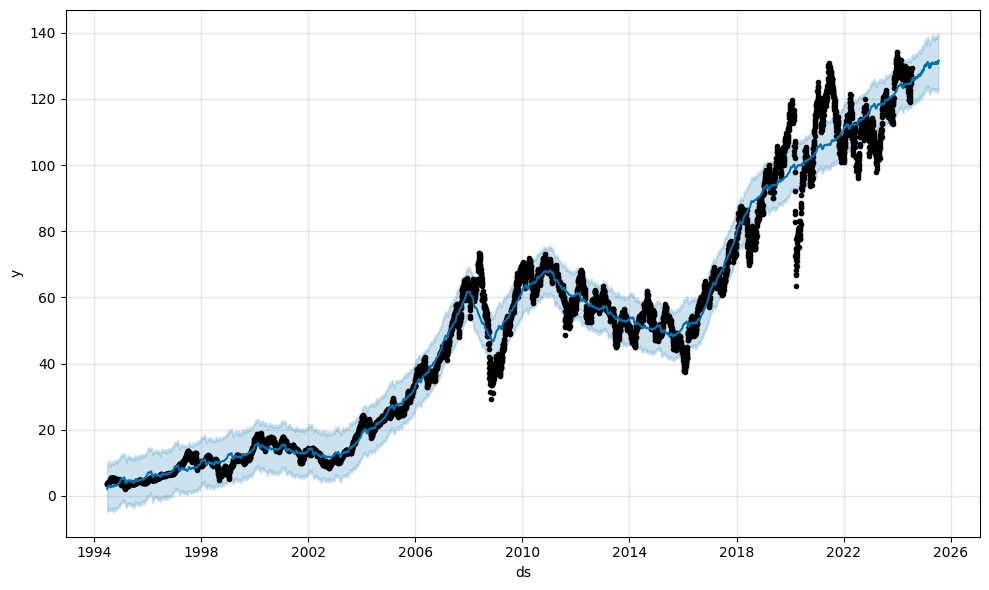

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

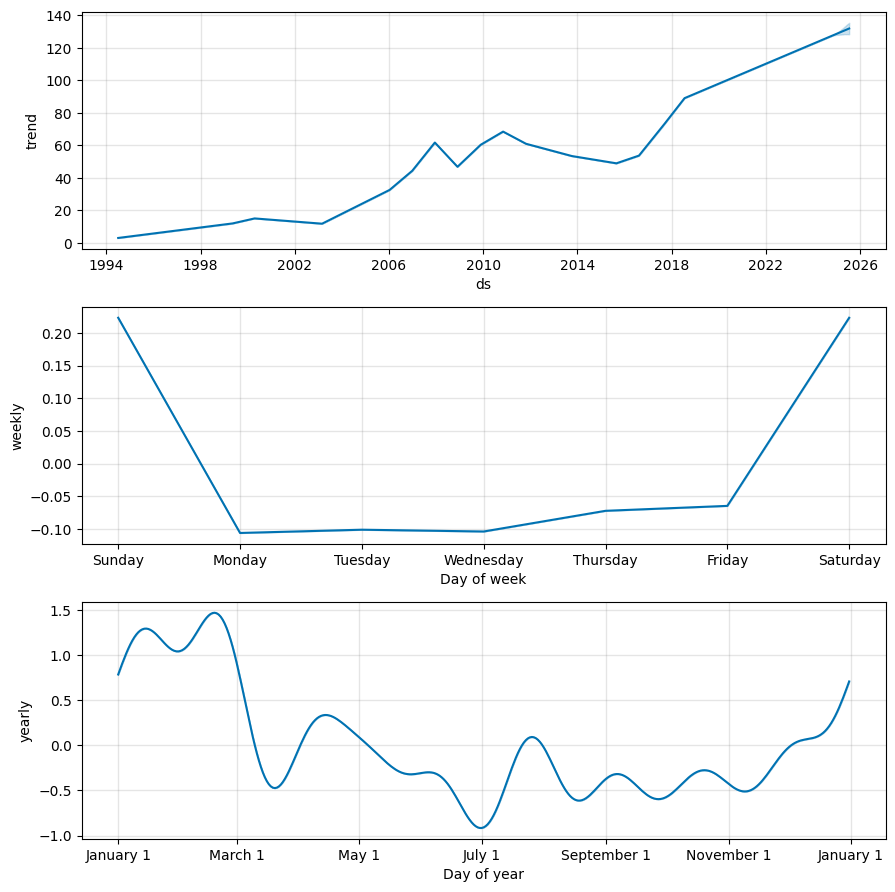

In [39]:
# Plot das previsões
fig1 = model.plot(forecast)
plt.show()

#plot dos componentes
fig2 = model.plot_components(forecast)
plt.show()


In [40]:
# Dividindo os dados em treinamento e teste (train/test)
train = dados[dados['ds'] < '2023-01-01']
test = dados[dados['ds'] >= '2023-01-01']

# Ajustando o modelo com os dados de treinamento
model = Prophet()
model.fit(train)

# Fazendo as previsões do conjunto de teste
future_test = model.make_future_dataframe(periods=len(test))
forecast_test = model.predict(future_test)

# Unindo os dados de teste e as previsões
test = test.set_index('ds')
forecast_test = forecast_test.set_index('ds')
results = test.join(forecast_test[['yhat']])

# Acuracidade
results['error'] = results['y'] - results['yhat']
mape = np.mean(np.abs(results['error']) / results['y']) * 100

print(f'Acuracidade: {100 - mape:.2f}%')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxunb_ped/y1oahvwj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxunb_ped/xvpm3mbt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75463', 'data', 'file=/tmp/tmpxunb_ped/y1oahvwj.json', 'init=/tmp/tmpxunb_ped/xvpm3mbt.json', 'output', 'file=/tmp/tmpxunb_ped/prophet_modeladbq0inu/prophet_model-20240730203616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:36:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:36:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Acuracidade: 88.90%
